In [1]:
import matplotlib.pyplot as plt
from src.contact_matrices import *

# Instructions

The function `LoadMatrices` takes the contact matrices aggregated by household and deployment and outputs a dictionary of classes.

In [2]:
CM = LoadMatrices()

`CM` is a dictionary. To access its entries we simply type `CM[h,d]` where `h` refers to the household and `d` to the deplyoment. Households identifiers have been de-anonymized and randomized and are numbers between $0$ and $59$. Deployments instead are numbers between $0$ and $2$ and correspond to the three measurement waves.

`CM[h,d]` is a *class* storing several contact matrices that can be accessed as follows:

```python
CM[h,d].C_counts
CM[h,d].C_sec
CM[h,d].T
CM[h,d].P
```

The name of these matrices is consistent with the notation adopted in the paper. We now provide an example, plotting the matrix $C_{\rm counts}$ of household $7$ in the third deployment (note that we start counting from zero).

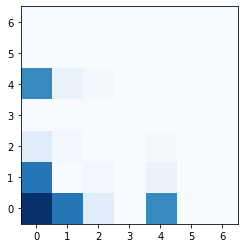

In [3]:
h = 7
d = 2

plt.imshow(CM[h,d].C_sec, cmap = 'Blues', origin = 'lower')
plt.show();

If we want to aggregate all measurements referring to a given deployment, we simply need to do as follows.

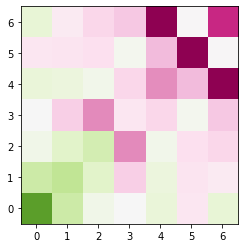

In [6]:
d = 2

C = np.mean([CM[h,d].C_counts for h in range(60)], axis = 0)
T = np.mean([CM[h,d].T for h in range(60)], axis = 0)

R = C/T
R = R/np.mean(R)
plt.imshow(np.log10(R), cmap = 'PiYG', vmin = -1., vmax = 1., origin = 'lower')
plt.show();

Finally, if we want to export the matrix in `.csv` format, we simply run the following command

```python
pd.DataFrame(R).to_csv('CM.csv')
```